# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets

In [2]:
train_df = pd.read_csv('input/exploring-predictive-health-factors/train.csv')
test_df = pd.read_csv('input/exploring-predictive-health-factors/test.csv')
cleaned_df = pd.read_csv('input/diet-exercise-and-pcos-insights/Cleaned-Data.csv')

# Display basic info about the dataset

In [3]:
print("Train Dataset Info:")
train_df.info()
print("\nTest Dataset Info:")
test_df.info()
print("\nCleaned Dataset Info:")
cleaned_df.info()

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     210 non-null    int64  
 1   Age                    209 non-null    object 
 2   Weight_kg              208 non-null    float64
 3   PCOS                   210 non-null    object 
 4   Hormonal_Imbalance     208 non-null    object 
 5   Hyperandrogenism       207 non-null    object 
 6   Hirsutism              205 non-null    object 
 7   Conception_Difficulty  209 non-null    object 
 8   Insulin_Resistance     209 non-null    object 
 9   Exercise_Frequency     208 non-null    object 
 10  Exercise_Type          208 non-null    object 
 11  Exercise_Duration      208 non-null    object 
 12  Sleep_Hours            208 non-null    object 
 13  Exercise_Benefit       209 non-null    object 
dtypes: float64(1), int64(1), object(12)
me

# Check for missing values in the datasets

In [4]:
print("\nMissing Values in Train Data:")
print(train_df.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_df.isnull().sum())
print("\nMissing Values in Cleaned Data:")
print(cleaned_df.isnull().sum())


Missing Values in Train Data:
ID                       0
Age                      1
Weight_kg                2
PCOS                     0
Hormonal_Imbalance       2
Hyperandrogenism         3
Hirsutism                5
Conception_Difficulty    1
Insulin_Resistance       1
Exercise_Frequency       2
Exercise_Type            2
Exercise_Duration        2
Sleep_Hours              2
Exercise_Benefit         1
dtype: int64

Missing Values in Test Data:
ID                       0
Age                      1
Weight_kg                2
Hormonal_Imbalance       3
Hyperandrogenism         1
Hirsutism                2
Conception_Difficulty    2
Insulin_Resistance       1
Exercise_Frequency       1
Exercise_Type            1
Exercise_Duration        0
Sleep_Hours              1
Exercise_Benefit         1
dtype: int64

Missing Values in Cleaned Data:
Age                           0
Weight_kg                     0
Height_ft                     0
Marital_Status                0
PCOS                   

# Check for duplicates

In [5]:
print("\nDuplicate Rows in Train Data:")
print(train_df.duplicated().sum())
print("\nDuplicate Rows in Test Data:")
print(test_df.duplicated().sum())
print("\nDuplicate Rows in Cleaned Data:")
print(cleaned_df.duplicated().sum())


Duplicate Rows in Train Data:
0

Duplicate Rows in Test Data:
0

Duplicate Rows in Cleaned Data:
0


# Display the first few rows of each dataset to get a sense of the data

In [6]:
print("\nTrain Data Sample:")
print(train_df.head())
print("\nTest Data Sample:")
print(test_df.head())
print("\nCleaned Data Sample:")
print(cleaned_df.head())


Train Data Sample:
   ID    Age  Weight_kg PCOS Hormonal_Imbalance Hyperandrogenism Hirsutism  \
0   0  20-25       64.0   No                 No               No        No   
1   1  15-20       55.0   No                 No               No        No   
2   2  15-20       91.0   No                 No               No       Yes   
3   3  15-20       56.0   No                 No               No        No   
4   4  15-20       47.0   No                Yes               No        No   

  Conception_Difficulty Insulin_Resistance Exercise_Frequency  \
0                    No                 No             Rarely   
1                    No                 No   6-8 Times a Week   
2                    No                 No             Rarely   
3                    No                 No   6-8 Times a Week   
4                    No                 No             Rarely   

                               Exercise_Type     Exercise_Duration  \
0  Cardio (e.g., running, cycling, swimming)      

# Descriptive statistics of the dataset

In [7]:
print("\nTrain Data Descriptive Statistics:")
print(train_df.describe())
print("\nCleaned Data Descriptive Statistics:")
print(cleaned_df.describe())


Train Data Descriptive Statistics:
               ID   Weight_kg
count  210.000000  208.000000
mean   104.500000   56.159615
std     60.765944   12.572768
min      0.000000   20.000000
25%     52.250000   48.000000
50%    104.500000   55.000000
75%    156.750000   64.000000
max    209.000000  116.000000

Cleaned Data Descriptive Statistics:
        Weight_kg   Height_ft  Diet_Bread_Cereals  Diet_Milk_Products  \
count  173.000000  173.000000          173.000000          173.000000   
mean    56.549711  160.636647            5.445087            3.647399   
std     12.025369    7.287373            2.116832            2.548930   
min     36.000000  124.460000            0.000000            0.000000   
25%     49.000000  157.480000            4.000000            1.000000   
50%     55.000000  160.020000            7.000000            3.000000   
75%     64.000000  165.100000            7.000000            7.000000   
max    115.000000  182.880000            7.000000            7.000000   

# Visualize missing values

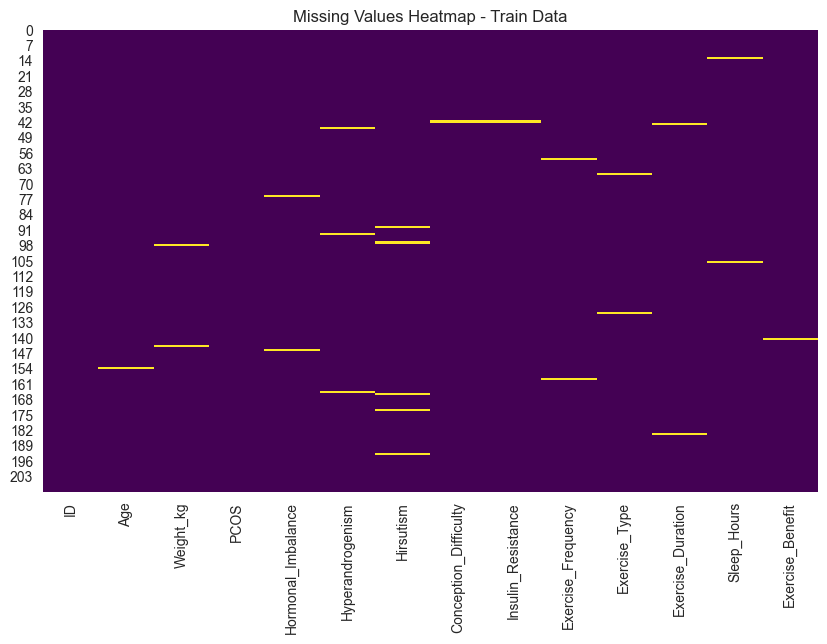

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Train Data')
plt.show()

# Visualize the distribution of numerical columns

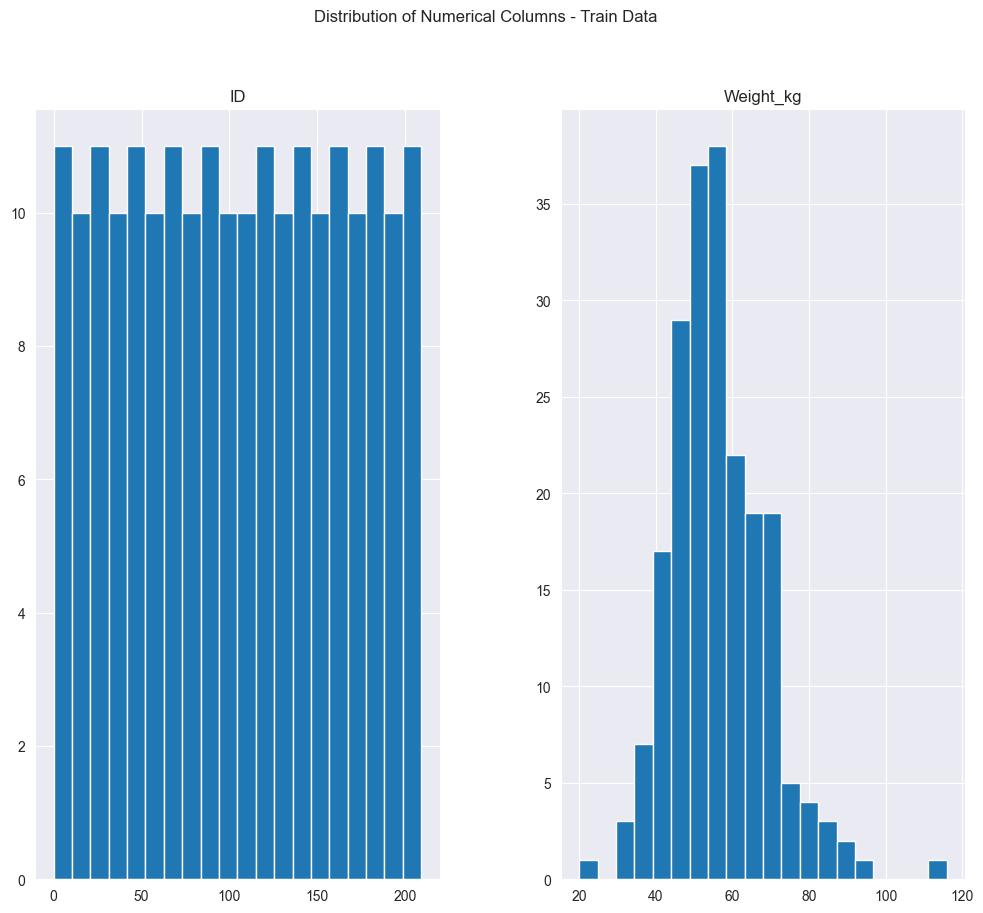

In [9]:
numerical_cols = train_df.select_dtypes(include=[np.number]).columns
train_df[numerical_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Numerical Columns - Train Data')
plt.show()

# Correlation heatmap

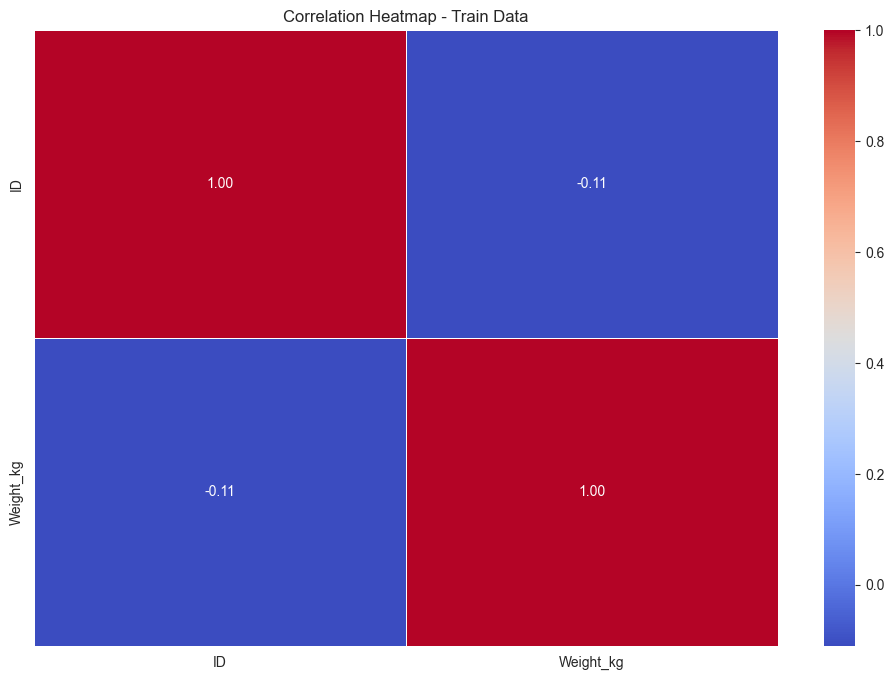

In [10]:
correlation_matrix = train_df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap - Train Data')
plt.show()

# Box plots to detect outliers

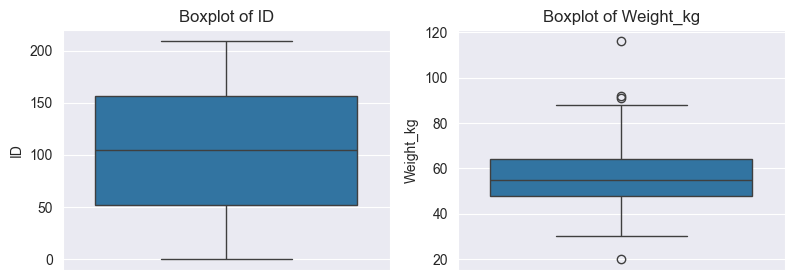

In [11]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Adjust for the number of numerical columns
    sns.boxplot(train_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Visualize categorical columns if any

C:\Users\Admin\AppData\Local\Temp\ipykernel_16364\1972604980.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax,
C:\Users\Admin\AppData\Local\Temp\ipykernel_16364\1972604980.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(),
C:\Users\Admin\AppData\Local\Temp\ipykernel_16364\1972604980.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax,
C:\Users\Admin\AppData\Local\Temp\ipykernel_16364\1972604980.py:42: UserWarning: set_ticklabels() should only

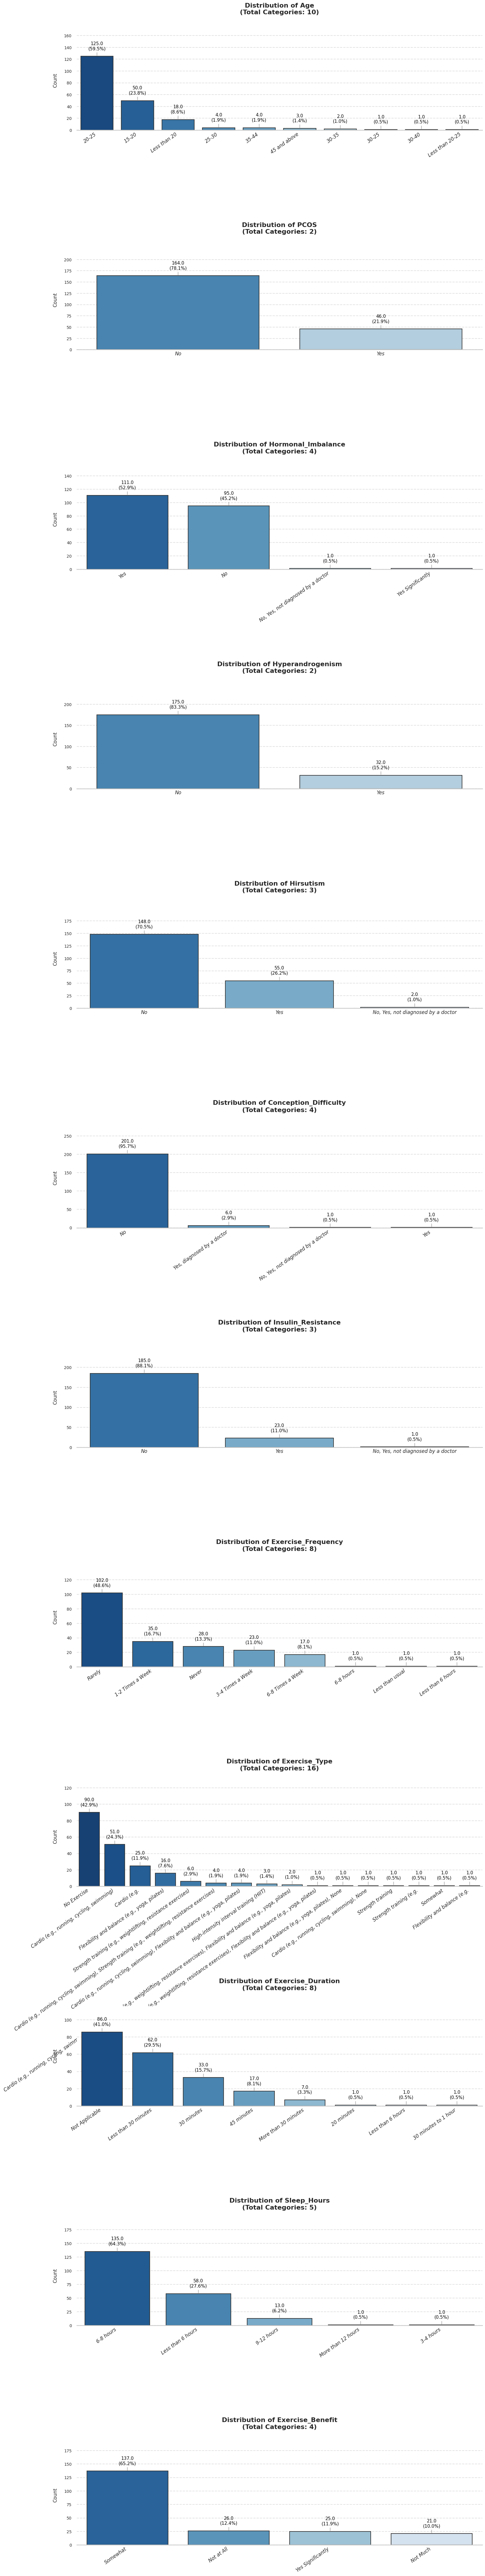

In [49]:
# Set style for clean aesthetics
sns.set_style("whitegrid", {"axes.grid": False})
sns.set_context("talk", font_scale=0.9)
plt.rcParams["font.family"] = "DejaVu Sans"  # Use a clean sans-serif font

# Get categorical columns
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
num_plots = len(categorical_cols)

# Create vertical subplot grid with increased spacing
fig = plt.figure(figsize=(18, 8 * num_plots))  # More vertical space per plot
gs = fig.add_gridspec(num_plots, 1, hspace=1.2)  # Significant vertical gap between plots

axes = []
for idx in range(num_plots):
    axes.append(fig.add_subplot(gs[idx]))

# Create count plots with enhanced formatting
for idx, (col, ax) in enumerate(zip(categorical_cols, axes)):
    value_counts = train_df[col].value_counts().sort_values(ascending=False)
    total = len(train_df[col])
    
    # Create ordered bar plot with consistent coloring
    palette = sns.color_palette("Blues_r", n_colors=len(value_counts))
    plot = sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, 
                       palette=palette, edgecolor=".2", linewidth=1.5)
    
    # Title and subtitle formatting
    ax.set_title(f"Distribution of {col}\n(Total Categories: {len(value_counts)})", 
                fontsize=16, pad=35, weight='semibold')
    
    # X-axis formatting
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)  # Remove tick marks
    if len(value_counts) > 3:
        plot.set_xticklabels(plot.get_xticklabels(), 
                            rotation=35, 
                            ha='right',
                            fontsize=12,
                            fontstyle='italic')
    else:
        plot.set_xticklabels(plot.get_xticklabels(), 
                            fontsize=12,
                            fontstyle='italic')
    
    # Y-axis formatting
    ax.set_ylabel("Count", fontsize=12, labelpad=15)
    ax.set_ylim(0, value_counts.max() * 1.35)  # More space for annotations
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.tick_params(axis='y', labelsize=10)
    
    # Smart annotations with consistent positioning
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:,}\n({height/total:.1%})',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 25),  # Always place above bar
                        textcoords='offset points',
                        fontsize=11,
                        color='black',
                        linespacing=1.2,
                        arrowprops=dict(arrowstyle="-", color="black", alpha=0.3))
    
    # Clean axis borders and add custom grid
    ax.spines[['top', 'right', 'left']].set_visible(False)
    ax.grid(axis='y', color='lightgrey', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)  # Ensure grid stays behind bars

# Final layout adjustments
plt.tight_layout(pad=8)  # Increased global padding
fig.subplots_adjust(top=0.95, bottom=0.05)  # Extra space at top and bottom
plt.show()